## Import libraries

In [63]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

sns.set(style='whitegrid')

stopwords = nltk.corpus.stopwords.words('english')

## Load the TSV files (tab-separated)

In [3]:
reviews_df = pd.read_csv('reviews.tsv', sep='\t')

## Let's have an overview of the dataset

In [5]:
reviews_df.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [6]:
reviews_df.describe()

,Id,Label
count,107018.000000,107018.000000
mean,53508.500000,4.581145
std,30893.579891,0.860956
min,0.000000,1.000000
25%,26754.250000,4.000000
50%,53508.500000,5.000000
75%,80262.750000,5.000000
max,107017.000000,5.000000


## Let's also check the distribution of the labels

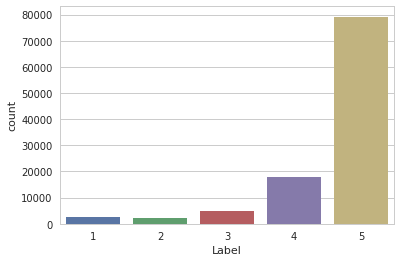

In [24]:
sns.countplot(x='Label', data=reviews_df)

As you can see, this is a highly-imbalanced dataset.

The label is ordered like this: **1 is Very Negative, 2 is Negative, 3 is Neutral, 4 is Positive, and 5 is Very Positive.**

## Let's create a simple Logistic Regression classifier

#### First, we have to create the features. We will be using the top 100 words (ordered by their frequency, descendingly) in the corpus (dataset). We will also remove the stop words based on the English stop words of the NLTK package. Only a single word will be considered a feature.

In [33]:
X_text = reviews_df['Review']
y = reviews_df['Label']

# Create a vectorizer that will transform the text data into their corresponding vectorized form
vectorizer = CountVectorizer(max_features=100, stop_words=stopwords, ngram_range=(1, 1))
vectorizer.fit(X_text)

# Split the dataset into training and testing dataset (the X values are still text data)
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42) # random_state is set for reproducibility

# Transform the X values to their vectorized form (the result is a sparse matrix for memory efficiency)
X_train = vectorizer.transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

####  Create the LogisticRegression classifier and train the model

In [45]:
model = LogisticRegression(verbose=False)
model.fit(X_train, y_train)

print('Training accuracy: %s' % (model.score(X_train, y_train)))
print('Testing accuracy: %s' % (model.score(X_test, y_test)))

# Let's view the top 100 words (ordered by their frequency, descendingly)
features = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)
print('\nTop 100 features')
for feature in features:
    print(feature[0], feature[1])

[LibLinear]Training accuracy: 0.7541990795897867
Testing accuracy: 0.7551392263128387

Top 100 features
would 99
world 98
work 97
well 96
week 95
way 94
want 93
videos 92
useful 91
use 90
understanding 89
understand 88
topics 87
time 86
think 85
things 84
thanks 83
thank 82
teaching 81
teacher 80
take 79
students 78
start 77
specialization 76
simple 75
recommend 74
really 73
real 72
python 71
programming 70
professor 69
presented 68
practical 67
people 66
part 65
one 64
nice 63
new 62
need 61
much 60
material 59
many 58
make 57
made 56
machine 55
loved 54
love 53
lot 52
little 51
like 50
life 49
lectures 48
learning 47
learned 46
learn 45
knowledge 44
know 43
introduction 42
interesting 41
instructor 40
informative 39
information 38
however 37
highly 36
helpful 35
help 34
great 33
good 32
get 31
fun 30
found 29
follow 28
first 27
explained 26
experience 25
excellent 24
examples 23
even 22
enjoyed 21
easy 20
dr 19
data 18
courses 17
coursera 16
course 15
could 14
content 13
concepts 12


Quite a reasonable accuracy but let's try improving this.

#### Let's try using a vectorizer that considers the term-frequency inverse document frequency ([TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))

In [46]:
vectorizer = TfidfVectorizer(max_features=100, stop_words=stopwords, ngram_range=(1, 1))
vectorizer.fit(X_text)

# Transform the X values to their vectorized form since we are using a vectorizer that considers the TF-IDF
X_train = vectorizer.transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# Let's try retraining the model again
model = LogisticRegression(verbose=False)
model.fit(X_train, y_train)

print('Training accuracy: %s' % (model.score(X_train, y_train)))
print('Testing accuracy: %s' % (model.score(X_test, y_test)))

# Let's view the top 100 words (ordered by their frequency, descendingly)
features = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)
print('\nTop 100 features')
for feature in features:
    print(feature[0], feature[1])

[LibLinear]Training accuracy: 0.7541990795897867
Testing accuracy: 0.7551392263128387

Top 100 features
would 99
world 98
work 97
well 96
week 95
way 94
want 93
videos 92
useful 91
use 90
understanding 89
understand 88
topics 87
time 86
think 85
things 84
thanks 83
thank 82
teaching 81
teacher 80
take 79
students 78
start 77
specialization 76
simple 75
recommend 74
really 73
real 72
python 71
programming 70
professor 69
presented 68
practical 67
people 66
part 65
one 64
nice 63
new 62
need 61
much 60
material 59
many 58
make 57
made 56
machine 55
loved 54
love 53
lot 52
little 51
like 50
life 49
lectures 48
learning 47
learned 46
learn 45
knowledge 44
know 43
introduction 42
interesting 41
instructor 40
informative 39
information 38
however 37
highly 36
helpful 35
help 34
great 33
good 32
get 31
fun 30
found 29
follow 28
first 27
explained 26
experience 25
excellent 24
examples 23
even 22
enjoyed 21
easy 20
dr 19
data 18
courses 17
coursera 16
course 15
could 14
content 13
concepts 12


As you can see, the accuracy is still the same.

#### What if we also consider a pair of words (bigram)? There are cases where there are negations (e.g. "not good") in the review.

In [58]:
# The ngram_range parameter is modified to use both unigram and bigram
vectorizer = TfidfVectorizer(max_features=100, stop_words=stopwords, ngram_range=(1, 2))
vectorizer.fit(X_text)

X_train = vectorizer.transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

model = LogisticRegression(verbose=False)
model.fit(X_train, y_train)

print('Training accuracy: %s' % (model.score(X_train, y_train)))
print('Testing accuracy: %s' % (model.score(X_test, y_test)))

# Let's view the top 100 words (ordered by their frequency, descendingly)
features = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)
print('\nTop 100 features')
for feature in features:
    print(feature[0], feature[1])

Training accuracy: 0.752505431354685
Testing accuracy: 0.7535040179405719

Top 100 features
would 99
world 98
work 97
well 96
week 95
way 94
want 93
videos 92
useful 91
use 90
understanding 89
understand 88
topics 87
time 86
think 85
things 84
thanks 83
thank 82
teaching 81
teacher 80
take 79
students 78
start 77
specialization 76
simple 75
recommend 74
really 73
real 72
python 71
programming 70
professor 69
practical 68
people 67
one 66
nice 65
new 64
need 63
much 62
material 61
many 60
make 59
made 58
machine learning 57
machine 56
love 55
lot 54
little 53
like 52
life 51
lectures 50
learning 49
learned 48
learn 47
knowledge 46
know 45
introduction 44
interesting 43
instructor 42
informative 41
information 40
highly 39
helpful 38
help 37
great course 36
great 35
good course 34
good 33
get 32
fun 31
found 30
follow 29
first 28
explained 27
experience 26
excellent course 25
excellent 24
examples 23
even 22
enjoyed 21
easy 20
dr 19
data 18
courses 17
coursera 16
course 15
could 14
conte

#### How about we increase the number of features to 500?

In [60]:
vectorizer = TfidfVectorizer(max_features=500, stop_words=stopwords, ngram_range=(1, 2))
vectorizer.fit(X_text)

X_train = vectorizer.transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

model = LogisticRegression(verbose=False)
model.fit(X_train, y_train)

print('Training accuracy: %s' % (model.score(X_train, y_train)))
print('Testing accuracy: %s' % (model.score(X_test, y_test)))

# Let's view the top 100 words (ordered by their frequency, descendingly)
features = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)
print('\nTop 100 features')
for feature in features:
    print(feature[0], feature[1])

Training accuracy: 0.7683322821033943
Testing accuracy: 0.7662586432442534

Top 100 features
yet 499
years 498
writing 497
write 496
would recommend 495
would like 494
would 493
worth 492
world 491
works 490
working 489
work 488
wonderful course 487
wonderful 486
without 485
wish 484
whole 483
well structured 482
well presented 481
well organized 480
well explained 479
well done 478
well 477
weeks 476
week 475
web 474
ways 473
way 472
wants 471
want 470
view 469
videos 468
video 467
various 466
valuable 465
using 464
useful course 463
useful 462
used 461
use 460
us 459
university 458
understanding 457
understand 456
two 455
try 454
truly 453
topics 452
topic 451
tools 450
took 449
together 448
tips 447
times 446
time 445
thought 444
though 443
thoroughly 442
thinking 441
think 440
things 439
thing 438
theory 437
thanks lot 436
thanks 435
thank much 434
thank 433
test 432
terms 431
techniques 430
technical 429
team 428
teaching 427
teaches 426
teachers 425
teacher 424
teach 423
taught 4

It seems like there are many important features that are not considered in our previous model.

#### How about 1000 features?

In [61]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords, ngram_range=(1, 2))
vectorizer.fit(X_text)

X_train = vectorizer.transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

model = LogisticRegression(verbose=False)
model.fit(X_train, y_train)

print('Training accuracy: %s' % (model.score(X_train, y_train)))
print('Testing accuracy: %s' % (model.score(X_test, y_test)))

# Let's view the top 100 words (ordered by their frequency, descendingly)
features = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)
print('\nTop 100 features')
for feature in features:
    print(feature[0], feature[1])

Training accuracy: 0.7768589249421823
Testing accuracy: 0.7725658755372827

Top 100 features
yet 999
years 998
year 997
wrong 996
written 995
writing 994
write 993
would recommend 992
would like 991
would better 990
would 989
worth time 988
worth 987
world 986
works 985
working 984
worked 983
work 982
words 981
wonderful course 980
wonderful 979
without 978
within 977
wish 976
wide 975
whole 974
went 973
well taught 972
well structured 971
well presented 970
well organized 969
well explained 968
well done 967
well designed 966
well 965
weeks 964
week 963
website 962
web development 961
web 960
ways 959
way learn 958
way 957
watching 956
watch 955
waste 954
wants 953
wanted 952
want learn 951
want 950
wait 949
view 948
videos 947
video lectures 946
video 945
version 944
various 943
value 942
valuable 941
using 940
usefull 939
useful information 938
useful course 937
useful 936
used 935
use 934
us 933
university 932
understood 931
understanding 930
understandable 929
understand 928
type 

#### 2000?

In [62]:
vectorizer = TfidfVectorizer(max_features=2000, stop_words=stopwords, ngram_range=(1, 2))
vectorizer.fit(X_text)

X_train = vectorizer.transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

model = LogisticRegression(verbose=False)
model.fit(X_train, y_train)

print('Training accuracy: %s' % (model.score(X_train, y_train)))
print('Testing accuracy: %s' % (model.score(X_test, y_test)))

# Let's view the top 100 words (ordered by their frequency, descendingly)
features = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)
print('\nTop 100 features')
for feature in features:
    print(feature[0], feature[1])

Training accuracy: 0.7833999112294718
Testing accuracy: 0.7744814053447954

Top 100 features
zero 1999
youtube 1998
young 1997
yet 1996
yes 1995
years ago 1994
years 1993
year 1992
yaakov 1991
wrong 1990
written 1989
writing 1988
write 1987
wright 1986
would suggest 1985
would say 1984
would recommend 1983
would nice 1982
would love 1981
would liked 1980
would like 1979
would highly 1978
would helpful 1977
would help 1976
would great 1975
would definitely 1974
would better 1973
would 1972
worthwhile 1971
worth time 1970
worth 1969
worst 1968
world 1967
works 1966
working 1965
worked 1964
work 1963
words 1962
word 1961
wonderful course 1960
wonderful 1959
without 1958
within 1957
wish could 1956
wish 1955
willing 1954
wide 1953
whole course 1952
whole 1951
whether 1950
went 1949
well worth 1948
well thought 1947
well taught 1946
well structured 1945
well put 1944
well presented 1943
well prepared 1942
well paced 1941
well organized 1940
well made 1939
well explained 1938
well done 1937


life examples 1066
life 1065
libraries 1064
levels 1063
level course 1062
level 1061
let 1060
lessons 1059
lesson 1058
less 1057
length 1056
left 1055
lectures well 1054
lectures good 1053
lectures 1052
lecturers 1051
lecturer 1050
lecture videos 1049
lecture 1048
leave 1047
least 1046
learnt lot 1045
learnt 1044
learning techniques 1043
learning python 1042
learning process 1041
learning new 1040
learning lot 1039
learning learn 1038
learning experience 1037
learning course 1036
learning algorithms 1035
learning 1034
learners 1033
learner 1032
learned much 1031
learned many 1030
learned lot 1029
learned course 1028
learned 1027
learn something 1026
learn python 1025
learn new 1024
learn much 1023
learn machine 1022
learn lot 1021
learn course 1020
learn basics 1019
learn basic 1018
learn 1017
leading 1016
leadership 1015
lead 1014
law 1013
later 1012
last week 1011
last 1010
large 1009
languages 1008
language 1007
laid 1006
lacks 1005
lacking 1004
lack 1003
labs 1002
lab 1001
kudos 10

anybody 66
answers 65
answer 64
another course 63
another 62
annoying 61
angularjs 60
angular 59
android 58
andrew ng 57
andrew 56
ancient 55
analytics 54
analysis 53
amount 52
among 51
american 50
amazing course 49
amazing 48
always 47
although 46
also good 45
also 44
already know 43
already 42
alot 41
along 40
alone 39
almost 38
allows 37
allowed 36
allow 35
algorithms 34
algorithm 33
algebra 32
ahead 31
ago 30
agile 29
age 28
advice 27
advanced 26
advance 25
additional 24
addition 23
adding 22
added 21
add 20
actually 19
actual 18
activities 17
active 16
across 15
achieve 14
accounting 13
accessible 12
access 11
academic 10
abstract 9
absolutely 8
absolute 7
able 6
ability 5
3d 4
30 3
20 2
100 1
10 0


Okay, let's stop at 2000. Even though the accuracy increases when the features increases, there will come a point if the features is large enough, that the accuracy won't change because of the unnecessary features.

#### We can try using a different classifier like a Random Forest Classifier

In [65]:
vectorizer = TfidfVectorizer(max_features=100, stop_words=stopwords, ngram_range=(1, 2))
vectorizer.fit(X_text)

X_train = vectorizer.transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

model = RandomForestClassifier(verbose=False)
model.fit(X_train, y_train)

print('Training accuracy: %s' % (model.score(X_train, y_train)))
print('Testing accuracy: %s' % (model.score(X_test, y_test)))

# Let's view the top 100 words (ordered by their frequency, descendingly)
features = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)
print('\nTop 100 features')
for feature in features:
    print(feature[0], feature[1])

Training accuracy: 0.9090335692760529
Testing accuracy: 0.7335544757989161

Top 100 features
would 99
world 98
work 97
well 96
week 95
way 94
want 93
videos 92
useful 91
use 90
understanding 89
understand 88
topics 87
time 86
think 85
things 84
thanks 83
thank 82
teaching 81
teacher 80
take 79
students 78
start 77
specialization 76
simple 75
recommend 74
really 73
real 72
python 71
programming 70
professor 69
practical 68
people 67
one 66
nice 65
new 64
need 63
much 62
material 61
many 60
make 59
made 58
machine learning 57
machine 56
love 55
lot 54
little 53
like 52
life 51
lectures 50
learning 49
learned 48
learn 47
knowledge 46
know 45
introduction 44
interesting 43
instructor 42
informative 41
information 40
highly 39
helpful 38
help 37
great course 36
great 35
good course 34
good 33
get 32
fun 31
found 30
follow 29
first 28
explained 27
experience 26
excellent course 25
excellent 24
examples 23
even 22
enjoyed 21
easy 20
dr 19
data 18
courses 17
coursera 16
course 15
could 14
cont

Though the training accuracy increased, we can see that the model does not generalize on unseen data.

#### What will happen if we increase the number of trees? Let's try 25.

In [66]:
vectorizer = TfidfVectorizer(max_features=100, stop_words=stopwords, ngram_range=(1, 2))
vectorizer.fit(X_text)

X_train = vectorizer.transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

model = RandomForestClassifier(n_estimators=25, verbose=False)
model.fit(X_train, y_train)

print('Training accuracy: %s' % (model.score(X_train, y_train)))
print('Testing accuracy: %s' % (model.score(X_test, y_test)))

# Let's view the top 100 words (ordered by their frequency, descendingly)
features = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)
print('\nTop 100 features')
for feature in features:
    print(feature[0], feature[1])

Training accuracy: 0.9143948419650991
Testing accuracy: 0.7419641188562885

Top 100 features
would 99
world 98
work 97
well 96
week 95
way 94
want 93
videos 92
useful 91
use 90
understanding 89
understand 88
topics 87
time 86
think 85
things 84
thanks 83
thank 82
teaching 81
teacher 80
take 79
students 78
start 77
specialization 76
simple 75
recommend 74
really 73
real 72
python 71
programming 70
professor 69
practical 68
people 67
one 66
nice 65
new 64
need 63
much 62
material 61
many 60
make 59
made 58
machine learning 57
machine 56
love 55
lot 54
little 53
like 52
life 51
lectures 50
learning 49
learned 48
learn 47
knowledge 46
know 45
introduction 44
interesting 43
instructor 42
informative 41
information 40
highly 39
helpful 38
help 37
great course 36
great 35
good course 34
good 33
get 32
fun 31
found 30
follow 29
first 28
explained 27
experience 26
excellent course 25
excellent 24
examples 23
even 22
enjoyed 21
easy 20
dr 19
data 18
courses 17
coursera 16
course 15
could 14
cont

Hmmm. The accuracy increased.

#### Let's increase the max_features in the vectorizer to 500

In [67]:
vectorizer = TfidfVectorizer(max_features=500, stop_words=stopwords, ngram_range=(1, 2))
vectorizer.fit(X_text)

X_train = vectorizer.transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

model = RandomForestClassifier(n_estimators=25, verbose=False)
model.fit(X_train, y_train)

print('Training accuracy: %s' % (model.score(X_train, y_train)))
print('Testing accuracy: %s' % (model.score(X_test, y_test)))

# Let's view the top 100 words (ordered by their frequency, descendingly)
features = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)
print('\nTop 100 features')
for feature in features:
    print(feature[0], feature[1])

Training accuracy: 0.9681944541780549
Testing accuracy: 0.7532704167445338

Top 100 features
yet 499
years 498
writing 497
write 496
would recommend 495
would like 494
would 493
worth 492
world 491
works 490
working 489
work 488
wonderful course 487
wonderful 486
without 485
wish 484
whole 483
well structured 482
well presented 481
well organized 480
well explained 479
well done 478
well 477
weeks 476
week 475
web 474
ways 473
way 472
wants 471
want 470
view 469
videos 468
video 467
various 466
valuable 465
using 464
useful course 463
useful 462
used 461
use 460
us 459
university 458
understanding 457
understand 456
two 455
try 454
truly 453
topics 452
topic 451
tools 450
took 449
together 448
tips 447
times 446
time 445
thought 444
though 443
thoroughly 442
thinking 441
think 440
things 439
thing 438
theory 437
thanks lot 436
thanks 435
thank much 434
thank 433
test 432
terms 431
techniques 430
technical 429
team 428
teaching 427
teaches 426
teachers 425
teacher 424
teach 423
taught 4